<h1>Classify Trees in Satellite Imagery</h1>
<img src="https://eoimages.gsfc.nasa.gov/images/imagerecords/40000/40228/moorhead_tm5_2009253.jpg" width=1000 height=400 alt="esto.nasa.gov"/>

<br>

<h2>Objective</h2>

<ul>
  <li> How to create a dataset object with <b>Trees in Satellite Imagery</b> dataset.</li>
</ul> 

<p>Tree detection can be used for applications such as vegetation management, forestry, urban planning, etc. Tree identifications are very important in terms of impending famine and forest fires.</p>

<br>

<h2>About Dataset</h2>

<p>This dataset is being used for classifying the land with class of trees or not in geospatial images.</p>

Satellite: [Sentinel - 2](https://sentinel.esa.int/web/sentinel/missions/sentinel-2)

<h3>Context</h3>

<p>The content architecture is simple. Each datum has 64x64 resolution and located under <i>tree</i> and <i>notree</i> folders.
Each folder (class) has 5200 images. So the total dataset has 10.4K images.</p>

To download the dataset, you need to have a kaggle account.

 - Dataset download link: [Kaggle](https://www.kaggle.com/datasets/mcagriaksoy/trees-in-satellite-imagery/download?datasetVersionNumber=1)
 - Dataset website: [Kaggle Trees in Satellite Imagery](https://www.kaggle.com/datasets/mcagriaksoy/trees-in-satellite-imagery)

<br>

<h1>Build Classifier Model with Pre-Trained Model ResNet-50</h1>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <ul>
    <li><a href="https://#download_data"> Unzip Data</a></li>
    <li><a href="https://#import"> Import Libraries and Packages </a></li>
    <li><a href="https://#data_preparation">Dataset Preparation</a></li>
    <li><a href="https://#compile_fit">Compile and Fit ResNet-50 Model</a></li>
    <li><a href="https://#train_model">Train the Model</a></li>
  </ul>

  <br>

  <p>Estimated Time Needed: <strong>15 min</strong></p>

</div>

<hr>

<br>

<h2 id="unzip_data">Unzip Data</h2>
<p>After downloading the dataset, we can unzip the file.</p>

In [1]:
!unzip -q archive.zip

<h2 id="import">Import Libraries and Packages</h2>

<p>The following are the libraries we are going to use for this lab:</p>

In [16]:
import matplotlib.pyplot as plt

In [17]:
import tensorflow as tf

<p>In this lab, we will be using the Keras library to build an image classifier</p>

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

<p>Finally, we will be leveraging the ResNet50 model to build our classifier</p>

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

<h2 id="data_preparation">Dataset Preparation</h2>

<p>We are going to separate our dataset as <i>7800</i> files for training and <i>2600</i> files for validation.</p>

In [4]:
num_classes = 1  # Our classification is binary. That's why we wrote as 1.

image_resize = (224, 224)

batch_size_training = 100
batch_size_validation = 100
directory = "/content/Trees in Satellite Imagery"

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=image_resize,
  batch_size=batch_size_training)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=image_resize,
  batch_size=batch_size_validation)

Found 10400 files belonging to 2 classes.
Using 7800 files for training.
Found 10400 files belonging to 2 classes.
Using 2600 files for validation.


<h2 id="compile_fit">Compile and Fit ResNet-50 Model</h2>

<img src="https://miro.medium.com/max/1400/0*9LqUp7XyEx1QNc6A.png" width=1000 height=300 alt="miro.medium.com"/>

<p>ResNet-50 is a convolutional neural network that is 50 layers deep. The network can take the input image having height, width as multiples of 32 and 3 as channel width. For the sake of explanation, we will consider the input size as 224 x 224 x 3. The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters.</p>

Reference: [Priya Dwivedi](https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33?gi=6a949f5c176c)

<p>In this section, we will start building our model. We will use the Sequential model class from Keras.</p>

In [6]:
model = Sequential()

<p>Next, we will add the ResNet-50 pre-trained model to out model. However, note that we don't want to include the top layer or the output layer of the pre-trained model. We actually want to define our own output layer and train it so that it is optimized for our image dataset. In order to leave out the output layer of the pre-trained model, we will use the argument <i>include_top</i> and set it to <b>False</b>.</p>

In [7]:
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

<p>Then, we will define our output layer as a <b>Dense</b> layer.</p>

In [8]:
model.add(Dense(num_classes, activation='sigmoid'))

<p>You can access the model's layers using the <i>layers</i> attribute of our model object.</p>

In [9]:
model.layers

<p>You can see that our model is composed of two sets of layers. The first set is the layers pertaining to ResNet50 and the second set is a single layer, which is our Dense layer that we defined above.</p>

<p>Print out the ResNet-50 model.</p>

In [10]:
model.layers[0].layers

<p>Since the ResNet50 model has already been trained, then we want to tell our model not to bother with training the ResNet part</p>

In [11]:
model.layers[0].trainable = False

<p>And now using the <i>summary</i> attribute of the model.</p>

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


<p>Next we compile our model using the <b>adam</b> optimizer.</p>

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<h2 id="train_model">Train the Model</h2>

<p>We will need to define how many steps compose an epoch. Typically, that is the number of images divided by the batch size. Therefore, we define our steps per epoch as follows:</p>

In [14]:
steps_per_epoch_training = len(train_dataset)
steps_per_epoch_validation = len(validation_dataset)
num_epochs = 2

<p>Finally, we are ready to start training our model.</p>

In [15]:
import time
start = time.time()

history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=num_epochs
)

end = time.time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

Epoch 1/2
78/78 [==============================] - 1571s 20s/step - loss: 0.2401 - accuracy: 0.9041 - val_loss: 0.1114 - val_accuracy: 0.9696
Epoch 2/2
78/78 [==============================] - 1558s 20s/step - loss: 0.0862 - accuracy: 0.9772 - val_loss: 0.0769 - val_accuracy: 0.9781
Elapsed Time:3167.705938100815s


In [18]:
# Function taken from https://www.kaggle.com/code/lucasarielsaavedra/satellite-images-classification-94-accuracy

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [19]:
num_parameters_time = {}
num_parameters_accuracy = {}
num_parameters = {}

num_parameters["Base"] = 23589761
num_parameters_time["Base"] = elapsed_time
num_parameters_accuracy["Base"] = history.history["val_accuracy"][-1]

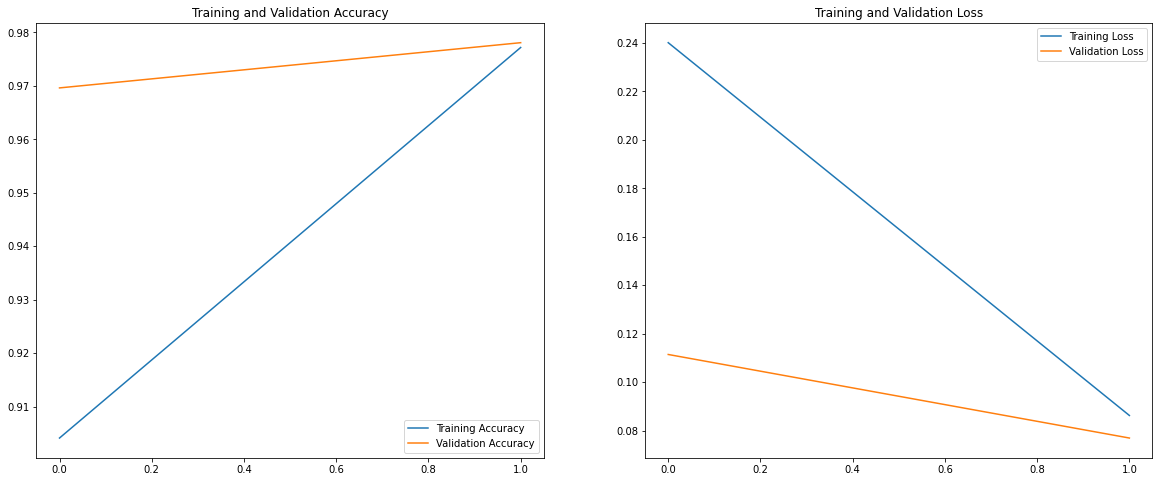

In [20]:
plot_history(history)

<p>Now that the model is trained, you are ready to start using it to classify images. Since training can take a long time when building deep learning models, it is always a good idea to save your model once the training is complete if you believe you will be using the model again later.</p>

<br>

<p>Save the model to as <b>classifier_resnet_model.h5</b>:</p>

In [21]:
model.save('classifier_resnet_model.h5')

<p>We can load our model with following codes:</p>

In [ ]:
#from keras.models import load_model
#model_resnet_50 = load_model('classifier_resnet_model.h5')

In [ ]:
#model_resnet_50.summary()

<hr>

<h1>Contact Me<h1>

<p>If you have something to say to me please contact me:<p>

*   Twitter: https://twitter.com/Doguilmak
*   Mail address: doguilmak@gmail.com